# Importing Libraries

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
import plotly.express as px
import pickle

# Loading Dataset

In [ ]:
#Reading Dataset using Pandas read_excel function
data = pd.read_excel("news.xlsx")

In [ ]:
#Displaying Dataset
data

,Category,Title,News_Article
0,Maraqlı,Naviforce Sport Saat 2016 ilə zövqlərin ahəngi,Naviforce Sport Saat 2016 Yapon Mexanizmi Yapo...
1,Maraqlı,"Sinir ,oynaq , sinir bel ağrılarına 3 gündə son !","ŞOK ! ŞOK ! ŞOK ! Xanımlar və bəylər , bel və ..."
2,Maraqlı,Dəyərindən qat-qat aşağı qiymətə Mənzil,Dəyərindən qat-qat Aşağı Qiymətə. Həzi Aslanov...
3,İdman,2024 və 2028-ci il olimpiadalarının keçiriləcə...,2028-ci il Yay Olimpiya və Paralimpiya Oyunla...
4,Dünya,Türkiyədə zəlzələ,Türkiyədə daha bir zəlzələ meydana gəlib. L...
...,...,...,...
49995,Siyasət,Əli Kərimli terrorçularla da əməkdaşlığa hazır...,"AXCP sədri ""Milli Şura""nın mitinqində qəsdən..."
49996,Siyasət,Elşən Musayev: “Bəlkə elə o terrorist Əli Kəri...,"""Ümumiyyətlə, Milli Şuraya xoş olan, hətta o..."
49997,Dünya,İstanbulda 52 mərtəbəli binada yanğın baş verib,Türkiyənin İstanbul şəhərinin Ataşehir rayon...
49998,Dünya,“Onlar cinayətkarlardır və bir-bir məhv edilir...,Rusiyanı tərk edərək İŞİD sıralarında döyüşə...


# Data Preprocessing and Modeling

In [ ]:
#Here, we separate each columns to their corresponding variables.
#It will help us join titles and articles. This process is usefull when we do BoW (Bag of Words) and (TF-IDF) methods.
titles = data['Title']
articles = data['News_Article']
categories = data['Category']

In [ ]:
#Here, we generate vocabulary of our dataset.

#Initialzing vocabulary which is empty string for now
vocabulary = ''
#Declaring the separator that will separate titles' last and articles' first words
separator = ' '
#Generating vocabulary by joining titles and separator
vocabulary = separator.join(titles) + separator.join(articles)

In [ ]:
#Displaying first 10000 characters of our vocabulary
vocabulary[:10000]

'Naviforce Sport Saat 2016 ilə zövqlərin ahəngi Sinir ,oynaq , sinir bel ağrılarına 3 gündə son ! Dəyərindən qat-qat aşağı qiymətə Mənzil 2024 və 2028-ci il olimpiadalarının keçiriləcəyi şəhərlər müəyyənləşib  Türkiyədə zəlzələ  Yay Olimpiadası-2024-ün ev sahibi bəlli oldu  ABŞ-ın Rusiyadakı səfirliyi viza verilməsi üzrə imtinaların sayını çoxaldıb  İlan Syalom: "Dağlıq Qarabağ münaqişəsinin yenidən qızışması regionda faciə ilə nəticələnə bilər"  Yunanıstanda 5.1 bal gücündə zəlzələ oldu  Mərakeşli sərnişinin mədəsindən 102 kapsul narkotik çıxdı  Məşhur müğənni səhnədə ayaq üstə dayana bilmədi - FOTOLAR  Banklar üçün ziyan nə qədər olub? Açıq məkandakı miniatürlər - FOTO Corc Kluni suriyalı uşaqların məktəbinə 2,25 mln. dollar ianə verəcək  Forbes: "Bakıda olmuş hər bir kəs ora yenə qayıtmaq arzusu ilə yaşayır və növbəti dəfə tək qayıtmır"  Şenol Günəş Türkiyə millisinə “YOX” dedi  “GoPro QuikStories” videonu avtomatik ötürəcək - VİDEO Tilsim qırıldı: “Qarabağ” pley-off mərhələsində! Y

In [ ]:
#In this cell, we create raw_data that consists of string values which are joining of titles and their corresponding articles.

#Initialing empty list for storing the data
raw_data = []
#Iterating over the length of data
for i in range(len(data)):
    #Appending titles and articles to raw_data by joining them by empty space
    raw_data.append(titles[i] + ' ' + articles[i])

In [ ]:
#Displaying first 100 data from raw_data
raw_data[:100]

['Naviforce Sport Saat 2016 ilə zövqlərin ahəngi Naviforce Sport Saat 2016 Yapon Mexanizmi Yapon batareykasi Deri Kəmər 1 İL zəmanət Pasport Qutu Su Keçirmir 3 ATM İNDİ SİFARİŞ ET ƏLAQƏ ÜÇÜN 055 239 54 49 BURADAN SİFARİŞ ET var SC_CId = "150627",SC_Domain="n.ads3-adnow.com";SC_Start_150627=(new Date).getTime(); Sağlamlıq \xa0 ',
 'Sinir ,oynaq , sinir bel ağrılarına 3 gündə son ! ŞOK ! ŞOK ! ŞOK ! Xanımlar və bəylər , bel və boyun ağrılarına son ! Sinir və oynaq oynaq ağrılarına son !Remmatik ağrılara son !Miqren və şiddətli bel ağrılarına son ! Bu ağrılardan azad olmağa hazırsınız?O zaman sizə HEMANI şirkətinin hər dərdə dəva olan HAZAL kremini təqdim edirik. Bildiyimiz kimi hər kəs bel,boyun və oynaq ağrılarından əziyyət çəkir.Bu ağrılara necə şəfa tapmaq olar? Artıq HEMANI şirkətinin kremi ilə baş ağrılarına,remmatizma ağrılarına,oynaq ağrılarına,miqren ağrılarına son qoyacaqsınız.Tam təbii bitkilərdən hazırlanan,təbiətin möcüzəsi sayılan Hazal kremi həm müalicəvi ,həm də ağrıkəsici

# BoW (Bag of Words)

In this section, we will firstly exctract features using BoW method and then do 3 different modeling tasks (Decision Tree, Naive Bayes, and SVC) using sklearn libraries.

In [ ]:
#Initializing the vectorizer
vectorizerBoW = CountVectorizer()
#Fitting vocabulary into vectorizer
vectorizerBoW.fit([vocabulary])
#Vectorizing our raw_data by transforming it using the vectorizer and naming as X
X = vectorizerBoW.transform(raw_data)

In [ ]:
#Printing the number of features
len(vectorizerBoW.get_feature_names_out())

233141

## Train-Test Split

In [ ]:
#Separating the data into train and test sets. We give 20% of the dataset to test set
X_train, X_test, y_train, y_test = train_test_split(X, categories, test_size = 0.2, random_state = 123)

## Decision Tree

### Hyperparameter Tuning

In [ ]:
#Setting parameters which will be tuned
parameters = {"max_depth": [None, 10, 20, 40], 
              "criterion": ["gini", "entropy"]}
#Setting model
classifierDT = DecisionTreeClassifier()

In [ ]:
#Initializing GridSearchCV optimizer
optimizerDT = GridSearchCV(classifierDT, parameters)
#Fitting train data into optimizer
optimizerDT.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 40]})

In [ ]:
#Printing best train accuracy score coming from the optimizer
accuracy_score(optimizerDT.predict(X_train), y_train)

0.9234

In [ ]:
#Printing best test accuracy score coming from the optimizer
accuracy_score(optimizerDT.predict(X_test), y_test)

0.7458

In [ ]:
#Printing best parameters coming from the optimizer
optimizerDT.best_params_

{'criterion': 'gini', 'max_depth': 40}

We see that the best parameters for this data are "gini" for 'criterion' and 40 for 'max_depth'. However, trained model perfectly performs in train data but not in test data which means overfitting. Below, we will do train a Decision Tree model with 'gini' citerion and 40 max_depth and then use Post-Pruning method to prevent overfitting.

### Preventing Overfitting

In [ ]:
#Initializing the classifier with "gini" criterion, 40 max_depth and ccp_alpha 0.0001 which stands for cost complexity
#pruning. It plays a role of regularization parameter and drop some of the branches in the tree to prevent overfitting.
classifierDT = DecisionTreeClassifier(criterion = 'gini', max_depth = 40, ccp_alpha = 0.0001)
#Training the model
classifierDT.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0001, max_depth=40)

In [ ]:
#Printing accuracy score for train set
accuracy_score(classifierDT.predict(X_train), y_train)

0.834825

### Testing the model with test set

In [ ]:
#Printing accuracy score for test set
accuracy_score(classifierDT.predict(X_test), y_test)

0.7681

### Accuracy Rate of minimum 80%

In [ ]:
#Printing Accuracy score of the model
accuracy_score(classifierDT.predict(X), categories)

0.82148

### Evaluating Precision, Recall and F1 Scores using Classification Report

In [ ]:
print(classification_report(classifierDT.predict(X), categories))

              precision    recall  f1-score   support

       Dünya       0.82      0.82      0.82     13522
     Maraqlı       0.83      0.79      0.81     16589
  Mədəniyyət       0.52      0.77      0.62      1050
     Siyasət       0.82      0.82      0.82      6555
       İdman       0.88      0.90      0.89      6073
İqtisadiyyat       0.82      0.84      0.83      6211

    accuracy                           0.82     50000
   macro avg       0.78      0.82      0.80     50000
weighted avg       0.82      0.82      0.82     50000



### Constructing Confusion Matrix

In [ ]:
print(confusion_matrix(classifierDT.predict(X), categories))

[[11086  1537   113   266   254   266]
 [ 1717 13157   394   525   308   488]
 [   63    80   804    57    11    35]
 [  253   370   144  5358    98   332]
 [  196   324    14    39  5461    39]
 [  159   397    78   296    73  5208]]


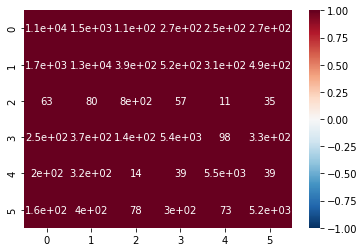

In [ ]:
#Plotting Confusion Matrix for better understanding using seaborn heatmat plot
sns.heatmap(confusion_matrix(classifierDT.predict(X), categories), annot = True,  vmin = -1, vmax = 1, center = 0, cmap = "RdBu_r")
plt.show()

In [ ]:
#Saving the model for Extra Task 2

#Opening a file
file = open('DTBoW.txt', 'wb')
#Dumping the model to the created binary file
pickle.dump(classifierDT, file)
#Closing the file
file.close()

So, we are done with Decision Tree modelling in BoW method. Now, we can move to the second model which is Naive Bayes.

## Naive Bayes

In Naive Bayes algorithm, we get some problems related to size of data and sparsity of the input matrix. This algorithm does not accept sparse matrix, we need to convert it to numpy array using toarray() function before fitting it into model. However, when we try to implement this function, we get memory error due to size of data. The last option to help us in this case is to decrease size of the data. We take first 5000 rows from the actual data and to avoid imbalance problem, we also increase the number of "Mədəniyyət" labeled data.

In [ ]:
#Getting first 5000 rows of the data
data = pd.concat([data.iloc[:5000, :], data[data["Category"] == "Mədəniyyət"].iloc[:400, :]])

In [ ]:
#Resetting index and dropping new "index" column
data.reset_index(inplace = True)
data.drop("index", axis = 1, inplace = True)

In [ ]:
#Displaying data
data

,Category,Title,News_Article
0,Maraqlı,Naviforce Sport Saat 2016 ilə zövqlərin ahəngi,Naviforce Sport Saat 2016 Yapon Mexanizmi Yapo...
1,Maraqlı,"Sinir ,oynaq , sinir bel ağrılarına 3 gündə son !","ŞOK ! ŞOK ! ŞOK ! Xanımlar və bəylər , bel və ..."
2,Maraqlı,Dəyərindən qat-qat aşağı qiymətə Mənzil,Dəyərindən qat-qat Aşağı Qiymətə. Həzi Aslanov...
3,İdman,2024 və 2028-ci il olimpiadalarının keçiriləcə...,2028-ci il Yay Olimpiya və Paralimpiya Oyunla...
4,Dünya,Türkiyədə zəlzələ,Türkiyədə daha bir zəlzələ meydana gəlib. L...
...,...,...,...
5395,Mədəniyyət,108 – ci mövsümdə bir neçə premyera gözlənilir,Musiqili Teatrı 108-ci mövsümün ilk dörd ayı...
5396,Mədəniyyət,İndoneziyada Azərbaycan mədəniyyət günləri keç...,İndoneziyanın Azərbaycandakı səfiri Hüsnan B...
5397,Mədəniyyət,Tarix Muzeyində arxeoloji xəzinə,AMEA Milli Azərbaycan Tarixi Muzeyi arxeoloj...
5398,Mədəniyyət,Musiqili Teatr yeni mövsümün ilk 4 ayı üçün re...,Azərbaycan Dövlət Musiqili Teatrı 108-ci mövs...


In [ ]:
#Using groupby function, observing number of each labels
data.groupby("Category").count()

,Title,News_Article
Category,,
Dünya,1523,1523
Maraqlı,1440,1440
Mədəniyyət,519,519
Siyasət,553,553
İdman,775,775
İqtisadiyyat,590,590


In [ ]:
#Here, we separate each columns to their corresponding variables.
#It will help us join titles and articles.
titles = data['Title']
articles = data['News_Article']
categories = data['Category']

In [ ]:
#Here, we generate vocabulary of our dataset.

#Initialzing vocabulary which is empty string for now
vocabulary = ''
#Declaring the separator that will separate titles' last and articles' first words
separator = ' '
#Generating vocabulary by joining titles and separator
vocabulary = separator.join(titles) + separator.join(articles)

In [ ]:
#In this cell, we create raw_data that consists of string values which are joining of titles and their corresponding articles.

#Initialing empty list for storing the data
raw_data = []
#Iterating over the length of data
for i in range(len(data)):
    #Appending titles and articles to raw_data by joining them by empty space
    raw_data.append(titles[i] + ' ' + articles[i])

In [ ]:
#Initializing the vectorizer
vectorizer = CountVectorizer()
#Fitting vocabulary into vectorizer
vectorizer.fit([vocabulary])
#Vectorizing our raw_data by transforming it using the vectorizer and naming as X
X = vectorizer.transform(raw_data)

In [ ]:
#Printing the number of features
len(vectorizer.get_feature_names_out())

70622

In [ ]:
#Converting sparse matrix into numpy array
X = X.toarray()

In [ ]:
#Separating the data into train and test sets. We give 20% of the dataset to test set
X_train, X_test, y_train, y_test = train_test_split(X, categories, test_size = 0.2, random_state = 123)

In [ ]:
classifierNB = GaussianNB()
classifierNB.fit(X_train, y_train)

GaussianNB()

In [ ]:
pred_train = classifierNB.predict(X_train)
#Printing accuracy score for train set
accuracy_score(pred_train, y_train)

0.9599537037037037

### Testing with Test Set

In [ ]:
pred_test = classifierNB.predict(X_test)
#Printing accuracy score for train set
accuracy_score(pred_test, y_test)

0.8037037037037037

### Hyperparameter Tuning and Preventing Overfitting

We got 80% accuracy for test set. However, as we do not have hyperparameters in Naive Bayes, we cannot do tuning and prevent overfitting.

### Evaluating Precision, Recall and F1 Scores using Classification Report

In [ ]:
print(classification_report(pred_test, y_test))

              precision    recall  f1-score   support

       Dünya       0.80      0.72      0.76       317
     Maraqlı       0.74      0.75      0.74       297
  Mədəniyyət       0.78      0.87      0.83       103
     Siyasət       0.77      0.79      0.78        95
       İdman       0.92      0.97      0.94       148
İqtisadiyyat       0.87      0.91      0.89       120

    accuracy                           0.80      1080
   macro avg       0.81      0.83      0.82      1080
weighted avg       0.80      0.80      0.80      1080



### Constructing Confusion Matrix

In [ ]:
print(confusion_matrix(pred_test, y_test))

[[228  70   0   8   4   7]
 [ 43 223  23   2   5   1]
 [  2   7  90   3   1   0]
 [  7   1   1  75   3   8]
 [  2   2   1   0 143   0]
 [  2   0   0   9   0 109]]


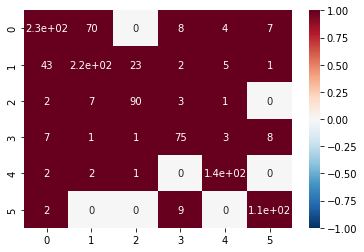

In [ ]:
#Plotting Confusion Matrix for better understanding using seaborn heatmat plot
sns.heatmap(confusion_matrix(pred_test, y_test), annot = True,  vmin = -1, vmax = 1, center = 0, cmap = "RdBu_r")
plt.show()

Again, because of data size, I did classification report, and confusion matrix tasks on test set becuase it has smaller size. And we are done with Naive Bayes algorithm using BoW method.

In [ ]:
#Saving the model for Extra Task 2

#Opening a file
file = open('NBBoW.txt', 'wb')
#Dumping the model to the created binary file
pickle.dump(classifierNB, file)
#Closing the file
file.close()

## SVC

We will again use low sized data as in Naive Bayes because SVC has also lots of steps and sending whole data into this model will crash the RAM or will take hours to train and we will not be able to train the model.

In [ ]:
#Getting first 5000 rows of the data
data = pd.concat([data.iloc[:5000, :], data[data["Category"] == "Mədəniyyət"].iloc[:400, :]])

In [ ]:
#Resetting index and dropping new "index" column
data.reset_index(inplace = True)
data.drop("index", axis = 1, inplace = True)

In [ ]:
#Displaying data
data

,Category,Title,News_Article
0,Maraqlı,Naviforce Sport Saat 2016 ilə zövqlərin ahəngi,Naviforce Sport Saat 2016 Yapon Mexanizmi Yapo...
1,Maraqlı,"Sinir ,oynaq , sinir bel ağrılarına 3 gündə son !","ŞOK ! ŞOK ! ŞOK ! Xanımlar və bəylər , bel və ..."
2,Maraqlı,Dəyərindən qat-qat aşağı qiymətə Mənzil,Dəyərindən qat-qat Aşağı Qiymətə. Həzi Aslanov...
3,İdman,2024 və 2028-ci il olimpiadalarının keçiriləcə...,2028-ci il Yay Olimpiya və Paralimpiya Oyunla...
4,Dünya,Türkiyədə zəlzələ,Türkiyədə daha bir zəlzələ meydana gəlib. L...
...,...,...,...
5395,Mədəniyyət,108 – ci mövsümdə bir neçə premyera gözlənilir,Musiqili Teatrı 108-ci mövsümün ilk dörd ayı...
5396,Mədəniyyət,İndoneziyada Azərbaycan mədəniyyət günləri keç...,İndoneziyanın Azərbaycandakı səfiri Hüsnan B...
5397,Mədəniyyət,Tarix Muzeyində arxeoloji xəzinə,AMEA Milli Azərbaycan Tarixi Muzeyi arxeoloj...
5398,Mədəniyyət,Musiqili Teatr yeni mövsümün ilk 4 ayı üçün re...,Azərbaycan Dövlət Musiqili Teatrı 108-ci mövs...


In [ ]:
#Using groupby function, observing number of each labels
data.groupby("Category").count()

,Title,News_Article
Category,,
Dünya,1523,1523
Maraqlı,1440,1440
Mədəniyyət,519,519
Siyasət,553,553
İdman,775,775
İqtisadiyyat,590,590


In [ ]:
#Here, we separate each columns to their corresponding variables.
#It will help us join titles and articles.
titles = data['Title']
articles = data['News_Article']
categories = data['Category']

In [ ]:
#Here, we generate vocabulary of our dataset.

#Initialzing vocabulary which is empty string for now
vocabulary = ''
#Declaring the separator that will separate titles' last and articles' first words
separator = ' '
#Generating vocabulary by joining titles and separator
vocabulary = separator.join(titles) + separator.join(articles)

In [ ]:
#In this cell, we create raw_data that consists of string values which are joining of titles and their corresponding articles.

#Initialing empty list for storing the data
raw_data = []
#Iterating over the length of data
for i in range(len(data)):
    #Appending titles and articles to raw_data by joining them by empty space
    raw_data.append(titles[i] + ' ' + articles[i])

In [ ]:
#Initializing the vectorizer
vectorizer = CountVectorizer()
#Fitting vocabulary into vectorizer
vectorizer.fit([vocabulary])
#Vectorizing our raw_data by transforming it using the vectorizer and naming as X
X = vectorizer.transform(raw_data)

In [ ]:
#Printing the number of features
len(vectorizer.get_feature_names_out())

70622

In [ ]:
#Separating the data into train and test sets. We give 20% of the dataset to test set
X_train, X_test, y_train, y_test = train_test_split(X, categories, test_size = 0.2, random_state = 123)

In [ ]:
#Initializing SVC
classifierSVC = SVC()
#Fitting train data into the classifier
classifierSVC.fit(X_train, y_train)

SVC()

In [ ]:
#Predicting train data
pred_train = classifierSVC.predict(X_train)
#Printing accuracy score for train set
accuracy_score(pred_train, y_train)

0.9180555555555555

In [ ]:
#Predicting test data
pred_test = classifierSVC.predict(X_test)
#Printing accuracy score for train set
accuracy_score(pred_test, y_test)

0.8342592592592593

The model performs well but we still see some minor overfitting here. Below, we will try to do hyperparameter tuning to find best parameters and to avoid overfitting.

### Hyperparameter Tuning

In [ ]:
#Setting parameters which will be tuned
parameters = {'C': [0.1, 1, 2, 5, 10, 100],
              'kernel': ['rbf']}
#Setting model
classifierSVC = SVC()

In [ ]:
#initializing optimizer
optimizerSVC = GridSearchCV(classifierSVC, parameters)
#Fitting train data into the optimizer
optimizerSVC.fit(X_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 2, 5, 10, 100], 'kernel': ['rbf']})

In [ ]:
optimizerSVC.best_params_

{'C': 5, 'kernel': 'rbf'}

In [ ]:
#Predicting train data
pred_train = optimizerSVC.predict(X_train)
#Printing accuracy score for train set
accuracy_score(pred_train, y_train)

0.9791666666666666

### Testing with Test Set

In [ ]:
#Predicting test data
pred_test = optimizerSVC.predict(X_test)
#Printing accuracy score for train set
accuracy_score(pred_test, y_test)

0.8472222222222222

### Accuracy of Minimum 80%

In [ ]:
predictions = optimizerSVC.predict(X)
#Printing accuracy score for train set
accuracy_score(predictions, categories)

0.9527777777777777

### Evaluating Precision, Recall and F1 Scores using Classification Report

In [ ]:
print(classification_report(predictions, categories))

              precision    recall  f1-score   support

       Dünya       0.95      0.94      0.94      1530
     Maraqlı       0.95      0.94      0.95      1457
  Mədəniyyət       0.94      0.97      0.95       503
     Siyasət       0.95      0.93      0.94       564
       İdman       0.98      0.99      0.98       768
İqtisadiyyat       0.95      0.97      0.96       578

    accuracy                           0.95      5400
   macro avg       0.95      0.96      0.95      5400
weighted avg       0.95      0.95      0.95      5400



### Constructing Confusion Matrix

In [ ]:
print(confusion_matrix(predictions, categories))

[[1442   47    2   14    5   20]
 [  55 1371   24    1    5    1]
 [   2    9  488    3    1    0]
 [  12    9    5  525    6    7]
 [   9    1    0    1  757    0]
 [   3    3    0    9    1  562]]


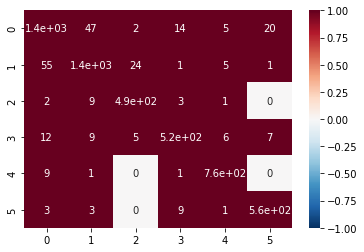

In [ ]:
#Plotting Confusion Matrix for better understanding using seaborn heatmat plot
sns.heatmap(confusion_matrix(predictions, categories), annot = True,  vmin = -1, vmax = 1, center = 0, cmap = "RdBu_r")
plt.show()

In [ ]:
#Building final model for saving

#Initializing SVC
classifierSVC = SVC(C = 5, kernel = "rbf")
#Fitting train data into the classifier
classifierSVC.fit(X_train, y_train)

SVC(C=5)

In [ ]:
#Saving the model for Extra Task 2

#Opening a file
file = open('SVCBoW.txt', 'wb')
#Dumping the model to the created binary file
pickle.dump(classifierSVC, file)
#Closing the file
file.close()

So, we finished all 3 models using BoW methods. Now, we can switch to TF-IDF method to do these models, again.

In [ ]:
#Initializing SVC
classifierSVC = SVC()
#Fitting train data into the classifier
classifierSVC.fit(X_train, y_train)

# TF-IDF (Term Frequency-Inverse Document Frequency)

In [ ]:
#Reading Dataset using Pandas read_excel function
data = pd.read_excel("news.xlsx")

In [ ]:
#Getting first 5000 rows of the data
data = pd.concat([data.iloc[:5000, :], data[data["Category"] == "Mədəniyyət"].iloc[:400, :]])

In [ ]:
#Reading Dataset using Pandas read_excel function
data = pd.read_excel("news.xlsx")

#Getting first 5000 rows of the data
data = pd.concat([data.iloc[:5000, :], data[data["Category"] == "Mədəniyyət"].iloc[:400, :]])

#Preparing data for TF-IDF vectorizer

#Joining title and news_article columns
data['Corpus'] = data[['Title', 'News_Article']].agg(''.join, axis = 1)
#Removing some unnecessary characters
data['Corpus'] = data['Corpus'].str.replace('[^\w\s]', '')
#Making all characters lowercase
data['Corpus'] = data['Corpus'].str.lower()

In [ ]:
#Displaying the data
data

,Category,Title,News_Article,Corpus
0,Maraqlı,Naviforce Sport Saat 2016 ilə zövqlərin ahəngi,Naviforce Sport Saat 2016 Yapon Mexanizmi Yapo...,naviforce sport saat 2016 ilə zövqlərin ahəngi...
1,Maraqlı,"Sinir ,oynaq , sinir bel ağrılarına 3 gündə son !","ŞOK ! ŞOK ! ŞOK ! Xanımlar və bəylər , bel və ...",sinir oynaq sinir bel ağrılarına 3 gündə son ...
2,Maraqlı,Dəyərindən qat-qat aşağı qiymətə Mənzil,Dəyərindən qat-qat Aşağı Qiymətə. Həzi Aslanov...,dəyərindən qatqat aşağı qiymətə mənzildəyərind...
3,İdman,2024 və 2028-ci il olimpiadalarının keçiriləcə...,2028-ci il Yay Olimpiya və Paralimpiya Oyunla...,2024 və 2028ci il olimpiadalarının keçiriləcəy...
4,Dünya,Türkiyədə zəlzələ,Türkiyədə daha bir zəlzələ meydana gəlib. L...,türkiyədə zəlzələ türkiyədə daha bir zəlzələ ...
...,...,...,...,...
16558,Mədəniyyət,108 – ci mövsümdə bir neçə premyera gözlənilir,Musiqili Teatrı 108-ci mövsümün ilk dörd ayı...,108 ci mövsümdə bir neçə premyera gözlənilir ...
16587,Mədəniyyət,İndoneziyada Azərbaycan mədəniyyət günləri keç...,İndoneziyanın Azərbaycandakı səfiri Hüsnan B...,i̇ndoneziyada azərbaycan mədəniyyət günləri ke...
16624,Mədəniyyət,Tarix Muzeyində arxeoloji xəzinə,AMEA Milli Azərbaycan Tarixi Muzeyi arxeoloj...,tarix muzeyində arxeoloji xəzinə amea milli a...
16657,Mədəniyyət,Musiqili Teatr yeni mövsümün ilk 4 ayı üçün re...,Azərbaycan Dövlət Musiqili Teatrı 108-ci mövs...,musiqili teatr yeni mövsümün ilk 4 ayı üçün re...


In [ ]:
#Separating Corpus and Category data
X = data["Corpus"]
y = data["Category"]

In [ ]:
#Using TF-IDF Method, Vectorizing the input data (Corpus)

#Initializing the vectorizer
vectorizerTFIDF = TfidfVectorizer()

#Fitting X into vectorizer and transforming the corpus
X = vectorizerTFIDF.fit_transform(X)

In [ ]:
X

<5400x78111 sparse matrix of type '<class 'numpy.float64'>'
	with 620866 stored elements in Compressed Sparse Row format>

In [ ]:
#Separating the data into train and test sets. We give 20% of the dataset to test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)

## Decision Tree

### Hyperparameter Tuning

In [ ]:
#Setting parameters which will be tuned
parameters = {"max_depth": [None, 10, 20, 40], 
              "criterion": ["gini", "entropy"]}
#Setting model
classifierDT = DecisionTreeClassifier()

In [ ]:
#Initializing GridSearchCV optimizer
optimizerDT = GridSearchCV(classifierDT, parameters)
#Fitting train data into optimizer
optimizerDT.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 40]})

In [ ]:
#Printing best train accuracy score coming from the optimizer
accuracy_score(optimizerDT.predict(X_train), y_train)

0.9997685185185186

In [ ]:
#Printing best test accuracy score coming from the optimizer
accuracy_score(optimizerDT.predict(X_test), y_test)

0.7333333333333333

In [ ]:
#Printing best parameters coming from the optimizer
optimizerDT.best_params_

{'criterion': 'gini', 'max_depth': None}

### Preventing Overfitting

In [ ]:
#Initializing the classifier with "gini" criterion, None max_depth and ccp_alpha 0.0013 which stands for cost complexity
#pruning. It plays a role of regularization parameter and drop some of the branches in the tree to prevent overfitting.
classifierDT = DecisionTreeClassifier(criterion = 'gini', max_depth = None, ccp_alpha = 0.0013)
#Training the model
classifierDT.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0013)

In [ ]:
#Printing accuracy score for train set
accuracy_score(classifierDT.predict(X_train), y_train)

0.8233796296296296

In [ ]:
#Printing accuracy score for test set
accuracy_score(classifierDT.predict(X_test), y_test)

0.7157407407407408

### Accuracy Rate of Minimum 80%

In [ ]:
#Printing Accuracy score of the model
accuracy_score(classifierDT.predict(X), y)

0.8018518518518518

### Evaluating Precision, Recall and F1 Scores using Classification Report

In [ ]:
print(classification_report(classifierDT.predict(X), y))

              precision    recall  f1-score   support

       Dünya       0.84      0.81      0.83      1592
     Maraqlı       0.83      0.79      0.81      1526
  Mədəniyyət       0.67      0.69      0.68       504
     Siyasət       0.74      0.82      0.78       498
       İdman       0.84      0.86      0.85       753
İqtisadiyyat       0.73      0.82      0.78       527

    accuracy                           0.80      5400
   macro avg       0.78      0.80      0.79      5400
weighted avg       0.80      0.80      0.80      5400



### Constructing Confusion Matrix

In [ ]:
print(confusion_matrix(classifierDT.predict(X), y))

[[1285  133   27   44   37   66]
 [ 157 1201   88   24   31   25]
 [  12   48  350   37   23   34]
 [  32    6   10  410   16   24]
 [  21   40   24    9  651    8]
 [  16   12   20   29   17  433]]


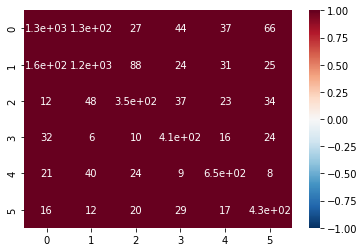

In [ ]:
#Plotting Confusion Matrix for better understanding using seaborn heatmat plot
sns.heatmap(confusion_matrix(classifierDT.predict(X), y), annot = True,  vmin = -1, vmax = 1, center = 0, cmap = "RdBu_r")
plt.show()

In [ ]:
#Saving the model for Extra Task 2

#Opening a file
file = open('DTTFIDF.txt', 'wb')
#Dumping the model to the created binary file
pickle.dump(classifierDT, file)
#Closing the file
file.close()

## Naive Bayes

In [ ]:
#Reading Dataset using Pandas read_excel function
data = pd.read_excel("news.xlsx")

In [ ]:
#Getting first 4000 rows of the data
data = pd.concat([data.iloc[:4000, :], data[data["Category"] == "Mədəniyyət"].iloc[:400, :]])

In [ ]:
#Preparing data for TF-IDF vectorizer

#Joining title and news_article columns
data['Corpus'] = data[['Title', 'News_Article']].agg(''.join, axis = 1)
#Removing some unnecessary characters
data['Corpus'] = data['Corpus'].str.replace('[^\w\s]', '')
#Making all characters lowercase
data['Corpus'] = data['Corpus'].str.lower()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  


In [ ]:
X = data["Corpus"]
y = data["Category"]

In [ ]:
#Using TF-IDF Method, Vectorizing the input data (Corpus)

#Initializing the vectorizer
vectorizerTFIDF = TfidfVectorizer()

#Fitting X into vectorizer and transforming the corpus
X = vectorizerTFIDF.fit_transform(X)

In [ ]:
#Converting sparse matrix into numpy array
X = X.toarray()

In [ ]:
#Separating the data into train and test sets. We give 20% of the dataset to test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)

In [ ]:
classifierNB = GaussianNB()
classifierNB.fit(X_train, y_train)

GaussianNB()

In [ ]:
pred_train = classifierNB.predict(X_train)
#Printing accuracy score for train set
accuracy_score(pred_train, y_train)

0.9678977272727273

### Testing with Test Set

In [ ]:
pred_test = classifierNB.predict(X_test)
#Printing accuracy score for train set
accuracy_score(pred_test, y_test)

0.7863636363636364

### Hyperparameter Tuning and Preventing Overfitting

As we do not have hyperparameters in Naive Bayes, we cannot do tuning and prevent overfitting.

In [ ]:
#Saving the model for Extra Task 2

#Opening a file
file = open('NBTFIDF.txt', 'wb')
#Dumping the model to the created binary file
pickle.dump(classifierNB, file)
#Closing the file
file.close()

## SVC

In [ ]:
#Reading Dataset using Pandas read_excel function
data = pd.read_excel("news.xlsx")

#Getting first 5000 rows of the data
data = pd.concat([data.iloc[:5000, :], data[data["Category"] == "Mədəniyyət"].iloc[:400, :]])

#Preparing data for TF-IDF vectorizer

#Joining title and news_article columns
data['Corpus'] = data[['Title', 'News_Article']].agg(''.join, axis = 1)
#Removing some unnecessary characters
data['Corpus'] = data['Corpus'].str.replace('[^\w\s]', '')
#Making all characters lowercase
data['Corpus'] = data['Corpus'].str.lower()
#Separating Corpus and Category data
X = data["Corpus"]
y = data["Category"]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: The default value of regex will change from True to False in a future version.
  if sys.path[0] == '':


In [ ]:
#Using TF-IDF Method, Vectorizing the input data (Corpus)

#Initializing the vectorizer
vectorizerTFIDF = TfidfVectorizer()

#Fitting X into vectorizer and transforming the corpus
X = vectorizerTFIDF.fit_transform(X)

In [ ]:
#Separating the data into train and test sets. We give 20% of the dataset to test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)

In [ ]:
#Initializing SVC
classifierSVC = SVC()
#Fitting train data into the classifier
classifierSVC.fit(X_train, y_train)

SVC()

In [ ]:
#Predicting train data
pred_train = classifierSVC.predict(X_train)
#Printing accuracy score for train set
accuracy_score(pred_train, y_train)

0.9590277777777778

In [ ]:
#Predicting test data
pred_test = classifierSVC.predict(X_test)
#Printing accuracy score for train set
accuracy_score(pred_test, y_test)

0.8166666666666667

We observe overfitting when training with default parameters. Therefore, we will try to to avoid it using hyperparameter tuning. It is also useful to find best parameters for our model.

### Hyperparameter Tuning

In [ ]:
#Setting parameters which will be tuned
parameters = {'C': [0.1, 1, 2, 5, 10, 100],
              'kernel': ['rbf']}
#Setting model
classifierSVC = SVC()

In [ ]:
#initializing optimizer
optimizerSVC = GridSearchCV(classifierSVC, parameters)
#Fitting train data into the optimizer
optimizerSVC.fit(X_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 2, 5, 10, 100], 'kernel': ['rbf']})

In [ ]:
optimizerSVC.best_params_

{'C': 10, 'kernel': 'rbf'}

In [ ]:
#Predicting train data
pred_train = optimizerSVC.predict(X_train)
#Printing accuracy score for train set
accuracy_score(pred_train, y_train)

0.9900462962962963

### Testing with Test Data

In [ ]:
#Predicting test data
pred_test = optimizerSVC.predict(X_test)
#Printing accuracy score for train set
accuracy_score(pred_test, y_test)

0.8379629629629629

### Accuracy Rate of minimum 80%

In [ ]:
#Initializing SVC
classifierSVC = SVC(C = 10, kernel = 'rbf')
#Fitting train data into the classifier
classifierSVC.fit(X_train, y_train)

SVC(C=10)

In [ ]:
#Predicting test data
pred = classifierSVC.predict(X)
#Printing accuracy score for train set
accuracy_score(pred, y)

0.9596296296296296

### Evaluating Precision, Recall and F1 Scores using Classification Report

In [ ]:
print(classification_report(classifierSVC.predict(X), y))

              precision    recall  f1-score   support

       Dünya       0.96      0.94      0.95      1542
     Maraqlı       0.96      0.94      0.95      1476
  Mədəniyyət       0.95      0.99      0.97       500
     Siyasət       0.95      0.97      0.96       539
       İdman       0.98      0.99      0.99       766
İqtisadiyyat       0.96      0.98      0.97       577

    accuracy                           0.96      5400
   macro avg       0.96      0.97      0.96      5400
weighted avg       0.96      0.96      0.96      5400



### Constructing Confusion Matrix

In [ ]:
print(confusion_matrix(classifierSVC.predict(X), y))

[[1456   48    0   17    6   15]
 [  54 1385   23    3    7    4]
 [   0    4  494    1    1    0]
 [   6    0    2  523    2    6]
 [   5    2    0    0  759    0]
 [   2    1    0    9    0  565]]


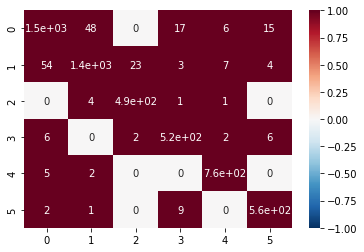

In [ ]:
#Plotting Confusion Matrix for better understanding using seaborn heatmat plot
sns.heatmap(confusion_matrix(classifierSVC.predict(X), y), annot = True,  vmin = -1, vmax = 1, center = 0, cmap = "RdBu_r")
plt.show()

In [ ]:
#Saving the model for Extra Task 2

#Opening a file
file = open('SVCTFIDF.txt', 'wb')
#Dumping the model to the created binary file
pickle.dump(classifierSVC, file)
#Closing the file
file.close()

# Extra 1

In [ ]:
#Reading Dataset using Pandas read_excel function
data = pd.read_excel("news.xlsx")

Again, we use small portion of data because of memory problems.

In [ ]:
#Getting first 5000 rows of the data
data = pd.concat([data.iloc[:5000, :], data[data["Category"] == "Mədəniyyət"].iloc[:400, :]])

In [ ]:
#Preparing data for TF-IDF vectorizer

#Joining title and news_article columns
data['Corpus'] = data[['Title', 'News_Article']].agg(''.join, axis = 1)
#Removing some unnecessary characters
data['Corpus'] = data['Corpus'].str.replace('[^\w\s]', '')
#Making all characters lowercase
data['Corpus'] = data['Corpus'].str.lower()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  


In [ ]:
X = data["Corpus"]
y = data["Category"]

In [ ]:
#Using TF-IDF Method, Vectorizing the input data (Corpus)

#Initializing the vectorizer
vectorizerTFIDF = TfidfVectorizer()

#Fitting X into vectorizer and transforming the corpus
X = vectorizerTFIDF.fit_transform(X)

In [ ]:
#Converting sparse matrix into numpy array
X = X.toarray()

In [ ]:
#Initializing PCA
pca = PCA(n_components = 3)
#Fitting vectorized data into PCA
pca.fit(X)

PCA(n_components=3)

In [ ]:
#Reducing dimension of X by transforming by the fitted PCA model
pca_data = pca.transform(X)

In [ ]:
#Creating new dataframe to store newly reduced data and their categories

#Initializing a new dataframe
pca_df = pd.DataFrame()
#Appending values to their corresponding columns
pca_df["First"] = pca_data[:, 0]
pca_df["Second"] = pca_data[:, 1]
pca_df["Third"] = pca_data[:, 2]
pca_df["Category"] = y.reset_index().drop("index", axis = 1).values
#Displaying the dataframe
pca_df

,First,Second,Third,Category
0,-0.042598,0.005052,0.004216,Maraqlı
1,0.049949,0.001016,-0.036429,Maraqlı
2,-0.019646,0.035166,0.019497,Maraqlı
3,0.030873,0.015656,0.044019,İdman
4,-0.073123,0.021605,0.051331,Dünya
...,...,...,...,...
5395,0.038596,0.005318,0.024523,Mədəniyyət
5396,0.166269,0.011356,0.061634,Mədəniyyət
5397,0.024234,0.017717,0.051625,Mədəniyyət
5398,0.059310,0.004468,0.013160,Mədəniyyət


In [ ]:
#Plotting 3-D interactive plot of reduced data.
fig = px.scatter_3d(pca_df, x = 'First', y = 'Second', z = 'Third', color = 'Category')
fig.show()

**NOTE:**

Because I have written these codes in Google Colab, the above interactive plot is not shown in first look. To see the plot, running only section "Extra 1" is enough.

# Extra 2

We need to divide 6 models into 2 parts becuase of their methods (BoW and TF-IDF). This means we have to choose 3 model for ensembling. I prefer to choose TF-IDF models. But, in our case, we trained Naive Bayes for TF-IDF with lowe size becuase of memory issues therefore it is a bit different than other TF-IDF models. As a results, I choose only 2 models for ensembling which are Decision Tree and Support Vector Classifier.

In [ ]:
#Loading Decision Tree TF-IDF model
model = open('DTTFIDF.txt', 'rb')
modelDTTFIDF = pickle.load(model)
model.close()

#Loading Support Vector Classifier TFIDF model
model = open('SVCTFIDF.txt', 'rb')
modelSVCTFIDF = pickle.load(model)
model.close()

In [ ]:
#Reading Dataset using Pandas read_excel function
data = pd.read_excel("news.xlsx")

In [ ]:
#Getting first 5000 rows of the data
data = pd.concat([data.iloc[:5000, :], data[data["Category"] == "Mədəniyyət"].iloc[:400, :]])

In [ ]:
#Preparing data for TF-IDF vectorizer

#Joining title and news_article columns
data['Corpus'] = data[['Title', 'News_Article']].agg(''.join, axis = 1)
#Removing some unnecessary characters
data['Corpus'] = data['Corpus'].str.replace('[^\w\s]', '')
#Making all characters lowercase
data['Corpus'] = data['Corpus'].str.lower()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  


In [ ]:
X = data["Corpus"]
y = data["Category"]

In [ ]:
#Using TF-IDF Method, Vectorizing the input data (Corpus)

#Initializing the vectorizer
vectorizerTFIDF = TfidfVectorizer()

#Fitting X into vectorizer and transforming the corpus
X = vectorizerTFIDF.fit_transform(X)

In [ ]:
#Building Ensembler Learner Function
def ensemble_learner(X):
    #Loading Decision Tree TF-IDF model
    model = open('DTTFIDF.txt', 'rb')
    modelDTTFIDF = pickle.load(model)
    model.close()

    #Loading Support Vector Classifier TFIDF model
    model = open('SVCTFIDF.txt', 'rb')
    modelSVCTFIDF = pickle.load(model)
    model.close()

    #Creating DataFrame consisting results of each model
    ensemble_df = pd.DataFrame()
    ensemble_df["DT TF-IDF"] = modelDTTFIDF.predict(X)
    ensemble_df["SVC TF-IDF"] = modelSVCTFIDF.predict(X)
    ensemble_pred = []
    j = 0
    #Iterating over results of model and creating ensemble learner based on some conditions
    for i in ensemble_df[["SVC TF-IDF"]].values:
        if i == ensemble_df[["DT TF-IDF"]].values[j]:
            ensemble_pred.append(i[0])
        else:
            ensemble_pred.append(i[0])
        j = j + 1
    #Appending results of ensemble learner to the dataframe
    ensemble_df["Ensemble"] = ensemble_pred
    #Returning the dataframe
    return ensemble_df

In [ ]:
#Using function getting dataframe of prediction of each model
ensemble_df = ensemble_learner(X)

In [ ]:
#Displaying the dataframe of model results
ensemble_df

,DT TF-IDF,SVC TF-IDF,Ensemble
0,Maraqlı,Maraqlı,Maraqlı
1,Maraqlı,Maraqlı,Maraqlı
2,Maraqlı,Maraqlı,Maraqlı
3,Maraqlı,İdman,İdman
4,Dünya,Dünya,Dünya
...,...,...,...
5395,Mədəniyyət,Mədəniyyət,Mədəniyyət
5396,Mədəniyyət,Mədəniyyət,Mədəniyyət
5397,Mədəniyyət,Mədəniyyət,Mədəniyyət
5398,Mədəniyyət,Mədəniyyət,Mədəniyyət


In [ ]:
#Initializing Lists for storing accuracies of models and their names
accuracies = []
models = ["DT TF-IDF","SVC TF-IDF", "Ensemble Learner"]
#Appending model accuracies to their corresponding lists
accuracies.append(accuracy_score(ensemble_df[["DT TF-IDF"]].values, y.reset_index().drop("index", axis = 1).values))
accuracies.append(accuracy_score(ensemble_df[["SVC TF-IDF"]].values, y.reset_index().drop("index", axis = 1).values))
accuracies.append(accuracy_score(ensemble_df[["Ensemble"]].values, y.reset_index().drop("index", axis = 1).values))

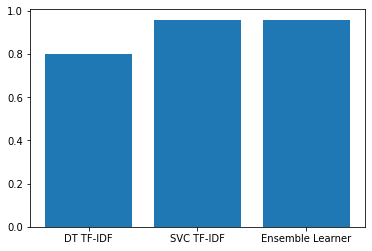

In [ ]:
#Plotting accuracies
plt.bar(models, accuracies)
plt.show()

Based on our ensemble classifier, the best model can be considered as either SVC or newly created ensemble learner. Having more RAM, we can also create more models for our purpose and develop ensemble learners using those more models.